<a href="https://colab.research.google.com/github/abhisheknagpure8/wine_quality_prediction/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: - Abhishek B. Nagpure**

# **Project Name**    - **Wine Quality Analysis**


##### **Project Type**    - Classification

# **Problem Statement**


These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/CORIZO---Data-Science-main/Main Project/1788410-1767134-1729261-1613779-Red_wine__(1).csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(1599, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

239

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

### What did you know about your dataset?

 Dataset contains missing value.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


### Variables Description 

Input variables (based on physicochemical tests):

1 - fixed acidity: -The amount of non-volatile acids in the wine

2 - volatile acidity: -The amount of acetic acid in wine, which can cause an unpleasant vinegar taste and smell

3 - citric acid: -The amount of citric acid in wine

4 - residual sugar: -The amount of sugar left after fermentation

5 - chlorides: -The amount of salt in the wine

6 - free sulfur dioxide: -The amount of SO2 that is not bound to other molecules and is able to act as an antioxidant and antimicrobial agent

7 - total sulfur dioxide: -The total amount of SO2 in the wine

8 - density: -The density of the wine

9 - pH: -The level of acidity on a scale of 0 to 14.

10 - sulphates: -The amount of sulphates in the wine, which contribute to its antimicrobial and antioxidant properties

11 - alcohol: -The alcohol content in wine

Output variable (based on sensory data):

12 - quality: - The sensory quality score of the wine, ranging from 0 (very bad) to 10 (very good)

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique(),".")

No. of unique values in fixed acidity is 96 .
No. of unique values in volatile acidity is 143 .
No. of unique values in citric acid is 80 .
No. of unique values in residual sugar is 91 .
No. of unique values in chlorides is 153 .
No. of unique values in free sulfur dioxide is 60 .
No. of unique values in total sulfur dioxide is 144 .
No. of unique values in density is 436 .
No. of unique values in pH is 55 .
No. of unique values in sulphates is 96 .
No. of unique values in alcohol is 65 .
No. of unique values in quality is 6 .


## ***3. Data Wrangling***

### What all manipulations have you done and insights you found?

* The dataset consists of 1599 rows and 12 columns
* The dataset contains 'quality' as the dependent variable. 
* The dataset also contains the duplicates values and the missing values 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Count of Quality

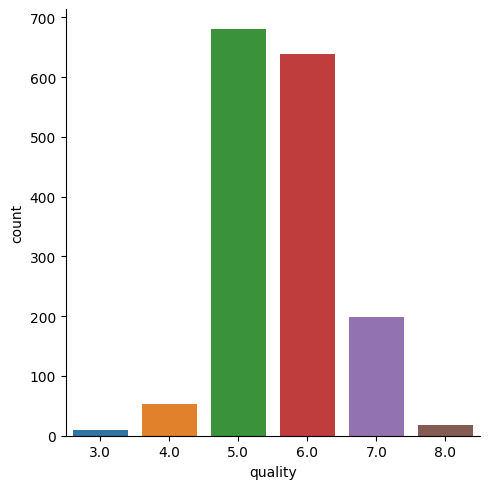

In [12]:
# Chart - 1 visualization code
sns.catplot(data=df,x = 'quality',kind='count')

##### 1. Why did you pick the specific chart?

catplot() function provides the relationship between a numerical and one or more categorical variables using one of several visual representations. 

##### 2. What is/are the insight(s) found from the chart?

We have quality value from 3 to 8 .If the quality value is less means the wine quality is bad and if the quality value is high means 7 or 8 , the wine quality is good.The number of quality values are more for 5 and 6.

#### Chart - 2 - Quality vs 'volatile acidity'

<Axes: xlabel='quality', ylabel='volatile acidity'>

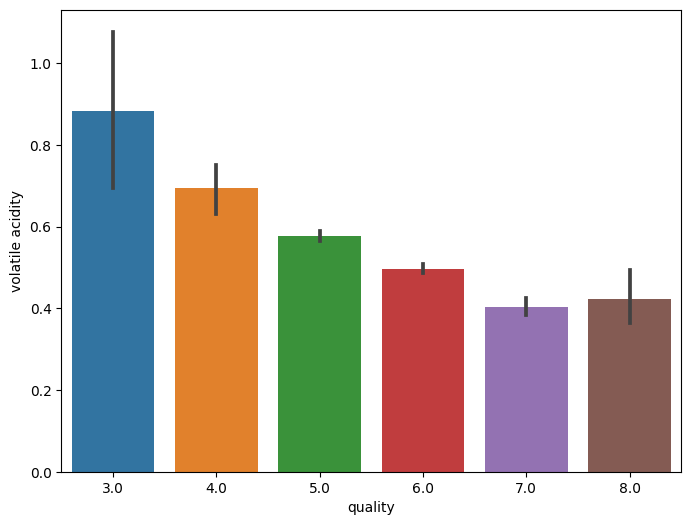

In [13]:
# Chart - 2 visualization code
plot = plt.figure(figsize=(8,6))
sns.barplot(data=df,x='quality',y='volatile acidity')

##### 1. Why did you pick the specific chart?

Bar plot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

If the volatile acidity is high ,the quality is less and similarly low the volatile acidity ,the quality is high.

The volatile acidity is inversely propotional to the quality.

#### Chart - 3 - Quality vs 'citric acid'

<Axes: xlabel='quality', ylabel='citric acid'>

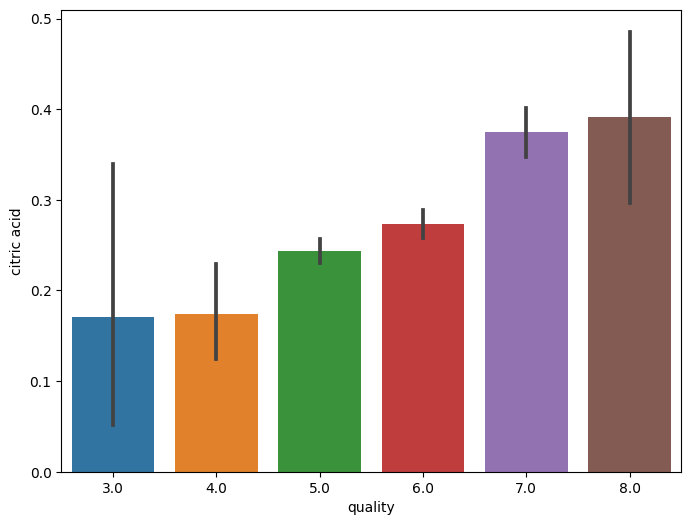

In [14]:
# Chart - 3 visualization code
plot = plt.figure(figsize=(8,6))
sns.barplot( data = df,x = 'quality', y = 'citric acid')

##### 1. Why did you pick the specific chart?

Bar plot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

If the citric acid value is high ,the quality is high and similarly low the value of citric acid ,low the quality.

Hence,the citric acid value is directly propotional to the quality.

#### Chart - 4 - Quality vs 'alcohol'

<Axes: xlabel='quality', ylabel='alcohol'>

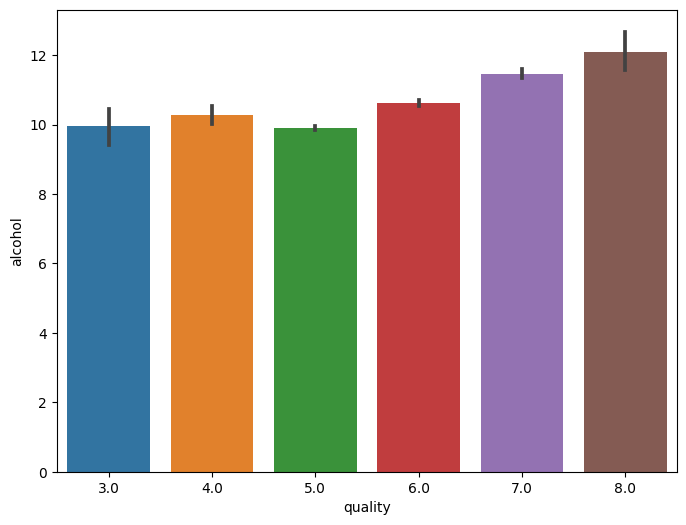

In [15]:
# Chart - 4 visualization code
plot = plt.figure(figsize=(8,6))
sns.barplot( data = df,x = 'quality', y = 'alcohol')

##### 1. Why did you pick the specific chart?

Bar plot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that as the quality of wine increases, the alcohol content also tends to increase. This suggests that there may be a positive correlation between the quality of wine and its alcohol content.

#### Chart - 5 - Quality vs 'sulphates'

<Axes: xlabel='quality', ylabel='sulphates'>

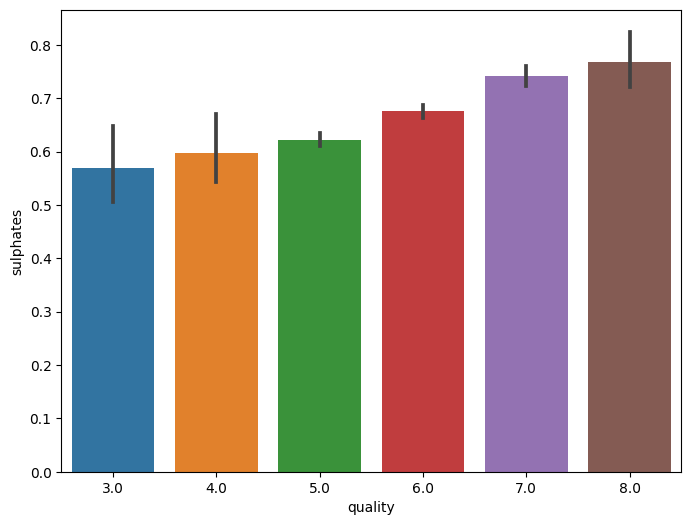

In [16]:
# Chart - 5 visualization code
plot = plt.figure(figsize=(8,6))
sns.barplot( data = df,x = 'quality', y = 'sulphates')

##### 1. Why did you pick the specific chart?

Bar plot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Sulphates level goes higher with the quality of wine.

#### Chart - 6 - Correlation Heatmap

<Axes: >

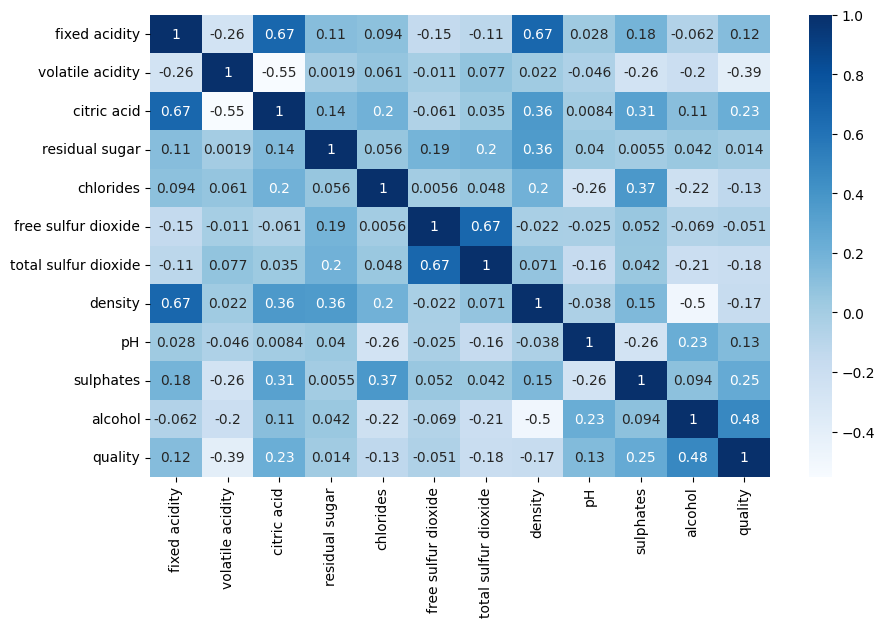

In [17]:
# Correlation Heatmap visualization code
# Plot the Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

**The strongly correlated items are :**
1. fixed acidity and citric acid. 
2. free sulphur dioxide and total sulphor dioxide. 
3. fixed acidity and density. 
4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.


**The weekly correlated items are :**
1. citric acid and volatile acidity. 
2. fixed acidity and ph. 
3. density and alcohol.

These are some relations which do not depend on each other at all.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [18]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


#### What all missing value imputation techniques have you used and why did you use those techniques?

Yes there were missing values present in the dataset.I didn't use any imputation i just drop the null values.

### 2. Handling Outliers

In [21]:
# Handling Outliers & Outlier treatments
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(df.describe().columns)-{'quality'})
possible_outlier_cols

['sulphates',
 'total sulfur dioxide',
 'pH',
 'volatile acidity',
 'residual sugar',
 'density',
 'chlorides',
 'free sulfur dioxide',
 'fixed acidity',
 'citric acid',
 'alcohol']

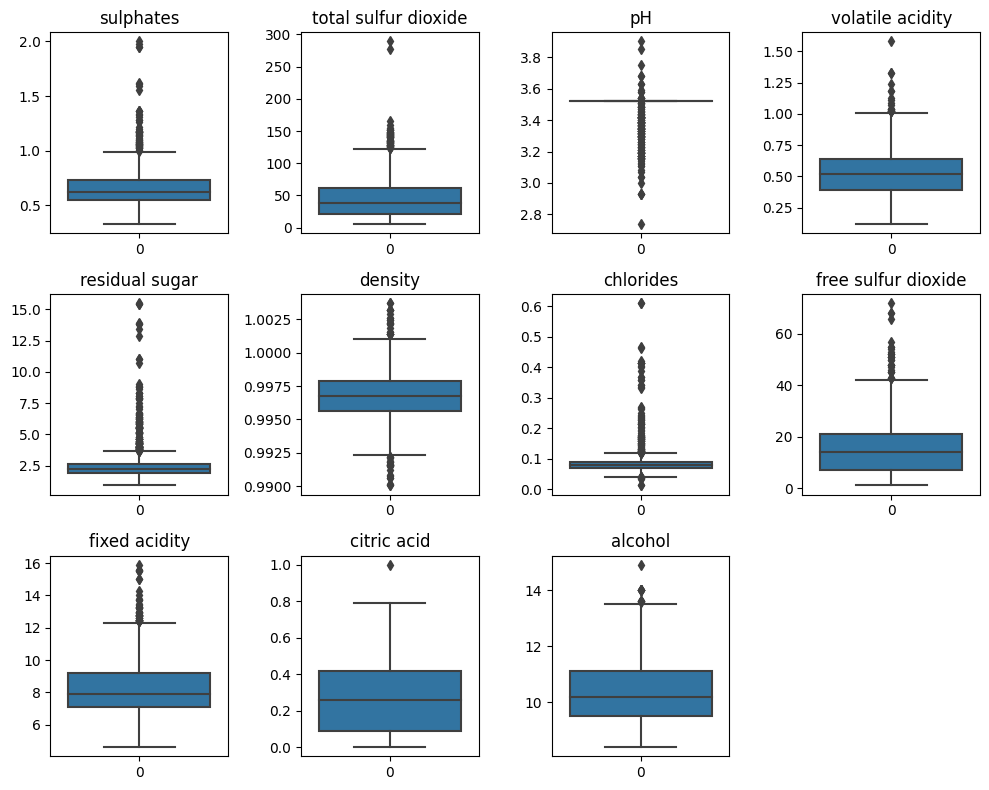

In [22]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,8))
for index,item in enumerate(possible_outlier_cols):
    plt.subplot(3, 4, index+1)
    sns.boxplot(df[item])
    plt.title("{}".format(item))

plt.tight_layout()

Here we can see that nearly all the columns contain outliers.

In [23]:
#Creating a list of columns that contains outliers
outlier_cols = possible_outlier_cols
outlier_cols

['sulphates',
 'total sulfur dioxide',
 'pH',
 'volatile acidity',
 'residual sugar',
 'density',
 'chlorides',
 'free sulfur dioxide',
 'fixed acidity',
 'citric acid',
 'alcohol']

In [24]:
#Finding the inter-quartile range for the columns with outliers
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

sulphates                0.180000
total sulfur dioxide    40.000000
pH                       0.000000
volatile acidity         0.250000
residual sugar           0.700000
density                  0.002242
chlorides                0.020000
free sulfur dioxide     14.000000
fixed acidity            2.100000
citric acid              0.330000
alcohol                  1.600000
dtype: float64

In [25]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [26]:
#Detecting and removing the outliers
df[outlier_cols] = df[outlier_cols][~((df[outlier_cols] < l_fence) | (df[outlier_cols] > u_fence))]

In [27]:
#Checking the number of outliers deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1547 non-null   float64
 1   volatile acidity      1577 non-null   float64
 2   citric acid           1595 non-null   float64
 3   residual sugar        1442 non-null   float64
 4   chlorides             1484 non-null   float64
 5   free sulfur dioxide   1566 non-null   float64
 6   total sulfur dioxide  1541 non-null   float64
 7   density               1551 non-null   float64
 8   pH                    1416 non-null   float64
 9   sulphates             1537 non-null   float64
 10  alcohol               1583 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 226.6 KB


Due to outlier deletion, some null values have been created in these possible outliers columns name .Now, we can either delete the observations with null values or impute them with some meaningfull values. In this case I will be imputing them with the median value of each column.

Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.

In [28]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [29]:
#Calling the imputing function
impute_null(outlier_cols)

In [30]:
#Checking if the imputation is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 226.6 KB


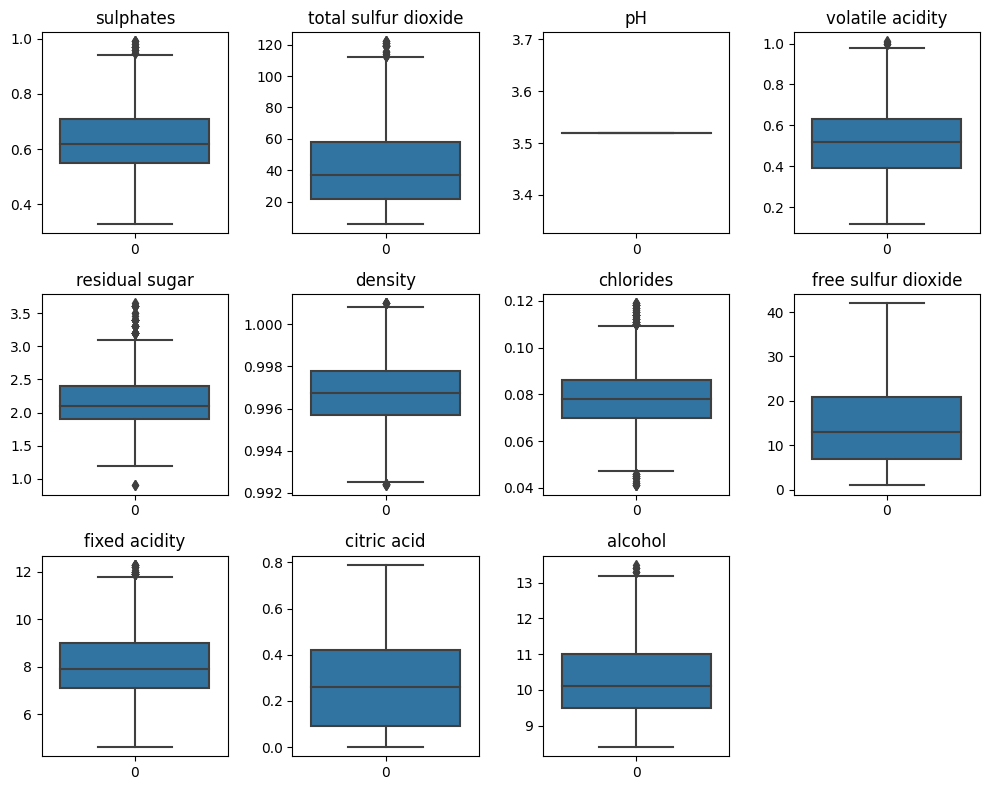

In [31]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,8))
for index,item in enumerate(possible_outlier_cols):
    plt.subplot(3, 4, index+1)
    sns.boxplot(df[item])
    plt.title("{}".format(item))

plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used the numerical outlier technique This is the simplest, nonparametric outlier detection method and define the upper and lower boundry as defined above

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ

### 3. Feature Manipulation

In [32]:
df['quality'] = df['quality'].map(lambda x:1 if x>=7 else 0)

In [33]:
df['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

Here i converted the quality rating into 1 and 0. here 1 means good and 0 means bad. The quality value which is equal to and greater than 7 is mapped to 1 and remaining less than 7 are mapped to 0. 

### 4. Feature Selection

In [34]:
# X Contains all independent column.
X = df.drop(['quality'],axis=1)

# y Contains Dependent column.
y = df['quality']   

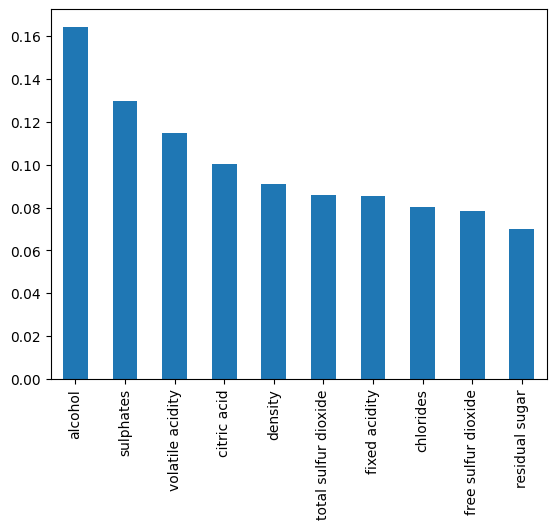

In [35]:
# Visualising the feature importance in dissending format. 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

##### What all feature selection methods have you used  and why?

Extra Trees Classifier is a useful algorithm for feature selection because it can efficiently handle high-dimensional data, select relevant features, and avoid overfitting.

##### Which all features you found important and why?

Based on above visualisation important features we are going to consider for machine learning models are:
* alcohol
* sulphates
* volatile acidity
* citric acid
* density
* total sulfur dioxide
* fixed acidity
* chlorides
* free sulphur dioxide 
* residual sugar

### 5. Handling Imbalanced Dataset

0    1379
1     217
Name: quality, dtype: int64

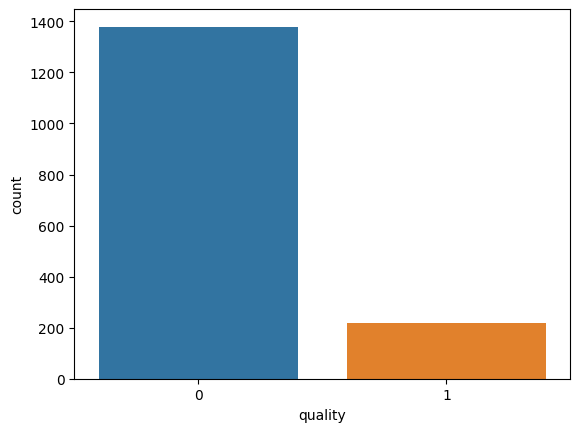

In [36]:
# Visualising Imbalance present in the dependent variable.
sns.countplot(x='quality',data=df)
df['quality'].value_counts()

##### Do you think the dataset is imbalanced? Explain Why.

The dependent column is highly imbalanced,  in the ratio of 86% of '0' counts and the remaining 14% are '1' counts. Hence in order to get the optimal bias of the machince learning model the dependent data has to be balanced.

In [37]:
# Handling Imbalanced Dataset.
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_new,y_new=os.fit_resample(X,y)

Original dataset shape Counter({0: 1379, 1: 217})
Resampled dataset shape Counter({0: 1379, 1: 1379})


<Axes: ylabel='count'>

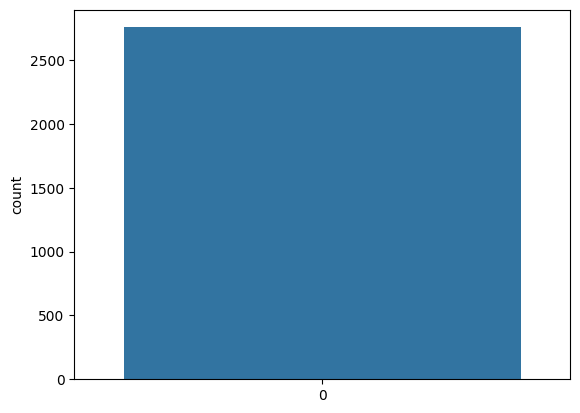

In [38]:
# Visualising dependent variable after deal with imbalance.
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

##### What technique did you use to handle the imbalance dataset and why? 

Choosing the technique called Random over sampling. Since the data is imbalanced of ratio 86% to 14%. Undersampling looses lots of information as the loss of data. Hence in order to overcome that situation the data has to be oversampled.

### 6. Data Splitting

In [39]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.3, random_state = 0) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1930, 11) (828, 11) (1930,) (828,)


In [40]:
# y train value counts.
y_train.value_counts()

1    965
0    965
Name: quality, dtype: int64

In [41]:
# y test value counts.
y_test.value_counts()

0    414
1    414
Name: quality, dtype: int64

##### What data splitting ratio have you used and why? 

Data is divided into 70% for training data and 30 % for testing data. Since data contains 1596 rows, so the model can evaluate 30% of the count. Hence the 70-30 ratio works good.

### 7. Data Scaling

In [42]:
# Data Scaling.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Standard scaler is the method used to scale the data. In this method the data is tranceformed such a way that

their μ = 0 and standard deviation = 1.

## Creating some functions for evaluation of model: -

In [43]:
# Creating a function for Evaluating model and giving required arrguments for that.

def evaluate_model_s(train_class_preds, test_class_preds, y_train, y_test, X_train, X_test, model):
    
        # Calculate train accuracy score
    train_accuracy = accuracy_score(train_class_preds, y_train)
    test_accuracy = accuracy_score(test_class_preds, y_test)
    
    print("The accuracy on train data is :", train_accuracy)
    print("The accuracy on test data is :", test_accuracy)
    print('')
    print('')

        # Calculate test accuracy score
    cm_train = confusion_matrix(train_class_preds, y_train)
    cm_test = confusion_matrix(test_class_preds, y_test)
    
    print("The confusion matrix on the train data is :")
    print('')
    print(cm_train)
    print('')
    print("The confusion matrix on the test data is :")
    print('')
    print(cm_test)
    print('')
    print('')
    
        # Calculate accuracy, precision, recall, f1-score
    train_report = classification_report(train_class_preds, y_train)
    test_report = classification_report(test_class_preds, y_test)
    
    print("The classification report on the train data is :")
    print('')
    print(train_report)
    print('')
    print("The classification report on the test data is :")
    print('')
    print(test_report)
    print('')
    print('')
    
    print("The Confusion matrix for over all Train and Test ")
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, test_class_preds)

   

In [44]:
# Function to evaluate and calculate accuracy, precision, recall, F1-score for overall accuracy. 

def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    print("The Confusion matrix visualization for over all Train and Test ")

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'auc': auc}

In [45]:
# Calculate area under curve (AUC) and visualise it on chart.

# Creating a function for Auc Roc Curve.
def auc_roc(model):
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  print(auc)

  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')


## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [46]:
# ML Model - 1 Implementation
lr= LogisticRegression()

# Fit the Algorithm.
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Get the predicted classes.

train_class_preds_lr = lr.predict(X_train)
test_class_preds_lr = lr.predict(X_test)

In [48]:
# Confusion matrix For train and test.

cm_train_lr = confusion_matrix(train_class_preds_lr, y_train)
cm_test_lr = confusion_matrix(test_class_preds_lr, y_test)

In [49]:
# Analysing logistic model with evaluatig it.

evaluate_model_s(train_class_preds_lr, test_class_preds_lr, y_train, y_test, X_train, X_test,lr)

The accuracy on train data is : 0.7860103626943005
The accuracy on test data is : 0.7983091787439613


The confusion matrix on the train data is :

[[741 189]
 [224 776]]

The confusion matrix on the test data is :

[[322  75]
 [ 92 339]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       930
           1       0.80      0.78      0.79      1000

    accuracy                           0.79      1930
   macro avg       0.79      0.79      0.79      1930
weighted avg       0.79      0.79      0.79      1930


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       397
           1       0.82      0.79      0.80       431

    accuracy                           0.80       828
   macro avg       0.80      0.80      0.80       828
weighted avg       0.80      0.80      0.80       828



The

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.7983091787439613,
 'prec': 0.7865429234338747,
 'rec': 0.8188405797101449,
 'f1': 0.8023668639053254,
 'auc': 0.8771499918317813}

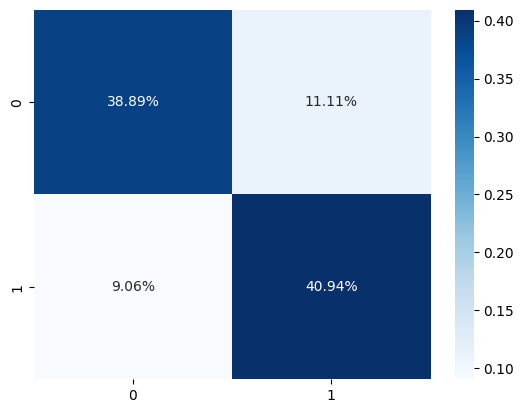

In [50]:
# Overall evaluation summary.
EV1 = evaluate_model(lr, X_test, y_test)
EV1

0.8771499918317813


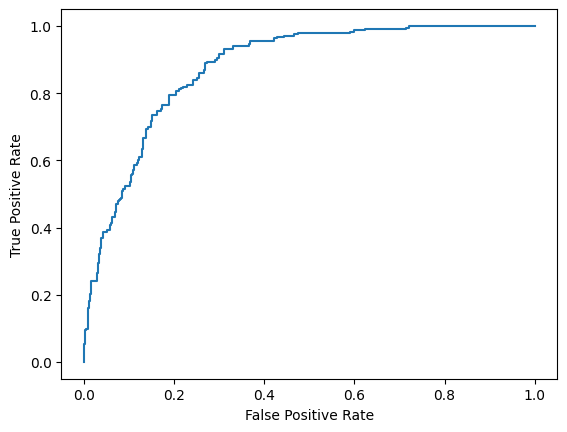

In [51]:
# Visualizing evaluation Metric Score chart
auc_roc(lr)

### ML Model - 2 - Decision Tree

In [52]:
# ML Model - 2 Implementation
dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

# Fit the Algorithm
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [53]:
# Get the predicted classes.
train_class_preds_dtc = dtc.predict(X_train)
test_class_preds_dtc = dtc.predict(X_test)

In [54]:
# Confusion matrix For train and test.
cm_train_dtc = confusion_matrix(train_class_preds_dtc, y_train)
cm_test_dtc = confusion_matrix(test_class_preds_dtc, y_test)

In [55]:
# Analysing Decission tree model with evaluatig it.
evaluate_model_s(train_class_preds_dtc, test_class_preds_dtc, y_train, y_test, X_train, X_test,dtc)

The accuracy on train data is : 0.8015544041450777
The accuracy on test data is : 0.8164251207729468


The confusion matrix on the train data is :

[[801 219]
 [164 746]]

The confusion matrix on the test data is :

[[344  82]
 [ 70 332]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1020
           1       0.77      0.82      0.80       910

    accuracy                           0.80      1930
   macro avg       0.80      0.80      0.80      1930
weighted avg       0.80      0.80      0.80      1930


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       426
           1       0.80      0.83      0.81       402

    accuracy                           0.82       828
   macro avg       0.82      0.82      0.82       828
weighted avg       0.82      0.82      0.82       828



The

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.8164251207729468,
 'prec': 0.8258706467661692,
 'rec': 0.8019323671497585,
 'f1': 0.8137254901960784,
 'auc': 0.8668142780461621}

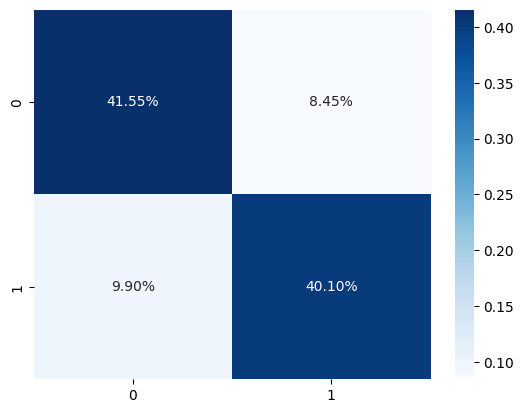

In [56]:
# Overall evaluation summary.
EV2 = evaluate_model(dtc, X_test, y_test)
EV2

0.8668142780461621


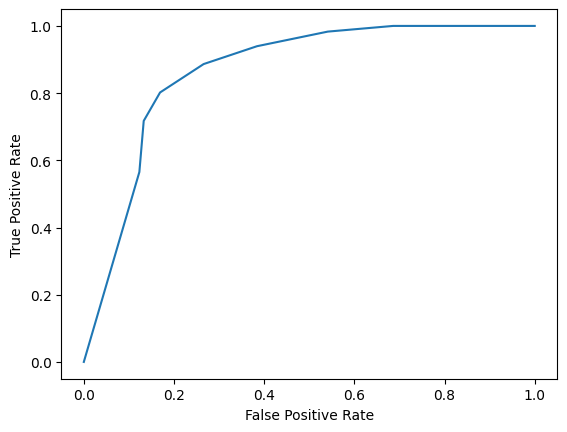

In [57]:
# Visualizing evaluation Metric Score chart
auc_roc(dtc)

### ML Model - 3

In [58]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier()
grid_values = {'n_estimators':[50, 80, 100,120], 'max_depth':[3, 5, 7]}
rf_model = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the Algorithm
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='roc_auc')

In [59]:
rf_model.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [60]:
# Get the predicted classes.
train_class_preds_rf = rf_model.predict(X_train)
test_class_preds_rf = rf_model.predict(X_test)

In [61]:
# Confusion matrix For train and test.
cm_train_rf = confusion_matrix(train_class_preds_rf, y_train)
cm_test_rf = confusion_matrix(test_class_preds_rf, y_test)

In [62]:
# Analysing Random forest (bagging) model with evaluatig it.
evaluate_model_s(train_class_preds_rf, test_class_preds_rf, y_train, y_test, X_train, X_test,rf_model)

The accuracy on train data is : 0.9549222797927461
The accuracy on test data is : 0.9359903381642513


The confusion matrix on the train data is :

[[897  19]
 [ 68 946]]

The confusion matrix on the test data is :

[[365   4]
 [ 49 410]]


The classification report on the train data is :

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       916
           1       0.98      0.93      0.96      1014

    accuracy                           0.95      1930
   macro avg       0.95      0.96      0.95      1930
weighted avg       0.96      0.95      0.95      1930


The classification report on the test data is :

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       369
           1       0.99      0.89      0.94       459

    accuracy                           0.94       828
   macro avg       0.94      0.94      0.94       828
weighted avg       0.94      0.94      0.94       828



The

The Confusion matrix visualization for over all Train and Test 


{'acc': 0.9359903381642513,
 'prec': 0.8932461873638344,
 'rec': 0.9903381642512077,
 'f1': 0.9392898052691867,
 'auc': 0.9852155242829471}

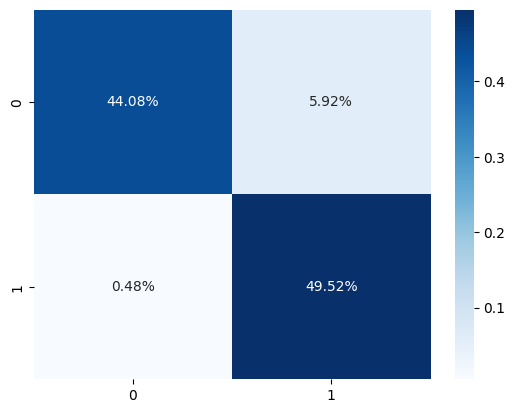

In [63]:
# Overall evaluation summary.
EV3 = evaluate_model(rf_model, X_test, y_test)
EV3

0.9852155242829471


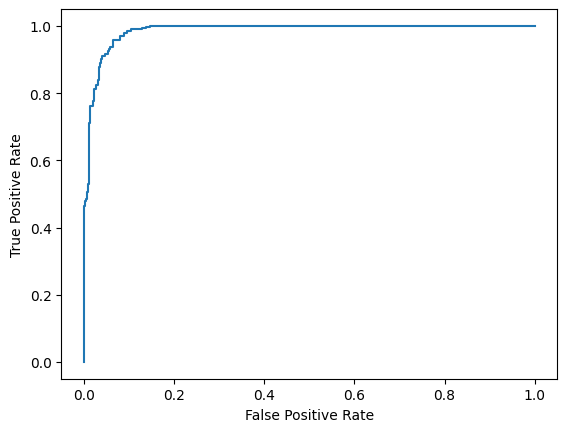

In [64]:
# Visualizing evaluation Metric Score chart
auc_roc(rf_model)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

 I choose accuracy as an appropriate evaluation metric to consider for a positive business impact as it measures the proportion of correct predictions made by a model, which is essential for ensuring that business decisions are based on reliable and trustworthy information. By maximizing accuracy, a model can provide valuable insights and aid in making informed decisions that can improve the quality and efficiency of business operations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [65]:
# Creating a veriable for All evaluation matrix.
Eval_overall = [EV1,EV2,EV3]

In [66]:
# Creating a dataframe from the All Evaluation matrix.

df_O = pd.DataFrame(Eval_overall, index=['Logistic_Regression', 'Decision_Tree', 'Random_Forest'])
df_O

,acc,prec,rec,f1,auc
Logistic_Regression,0.798309,0.786543,0.818841,0.802367,0.877150
Decision_Tree,0.816425,0.825871,0.801932,0.813725,0.866814
Random_Forest,0.935990,0.893246,0.990338,0.939290,0.985216


Text(0.5, 1.0, 'Comparison of Metrics for Different Models')

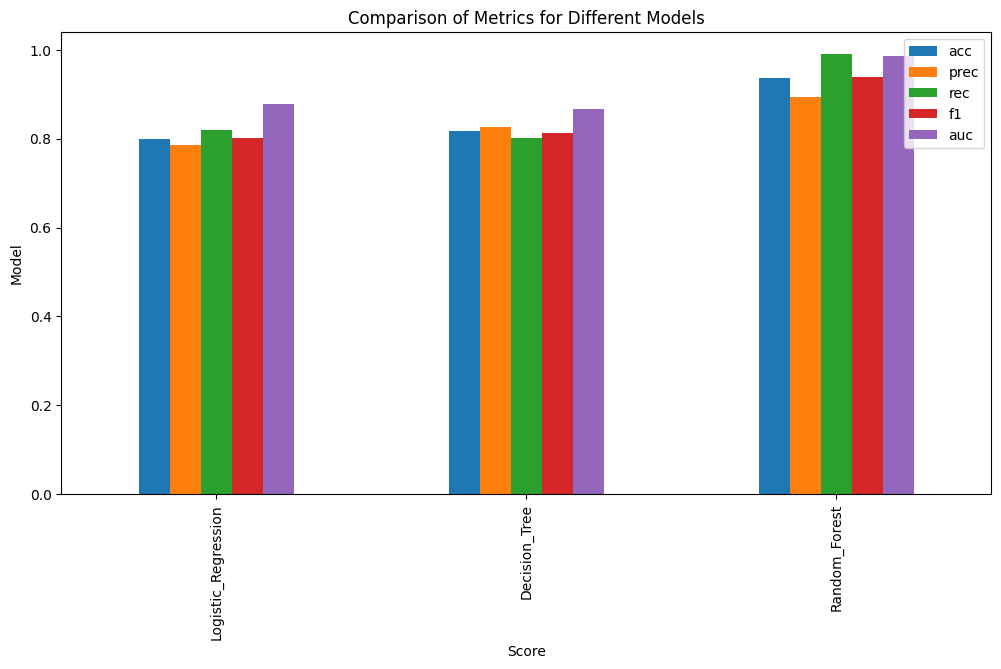

In [67]:
# Create a horizontal bar plot

ax = df_O.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_xlabel('Score')
ax.set_ylabel('Model')
ax.set_title('Comparison of Metrics for Different Models')

The top-performing models in terms of accuracy, precision, recall, and F1-score are Random Forest and Decision Tree. This suggests that these models are equally good at predicting the target variable.

# **Conclusion**

The analysis involved exploring the dataset, performing exploratory data analysis, data preprocessing, feature selection, building and training machine learning models to predict wine quality. Several models are evaluated, and the best performing model is selected i.e Random Forest based on its accuracy score. The results showed the model is able to predict the quality of wine with a high degree of accuracy, indicating that the physicochemical properties of the wine are strongly correlated with the quality.

Overall, the wine quality prediction analysis has the potential to aid winemakers in improving the quality of their wine and enhancing customer satisfaction. It also has significant implications for the wine industry as a whole, as it can help to identify the key factors that contribute to high-quality wine and inform decision-making processes regarding wine production and marketing.